In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import gc
import re

from tqdm import tqdm

cmap = plt.get_cmap('inferno')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cmap(np.linspace(0, 1, 11)))
markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', '+', 'H']

#plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=17)
plt.rc('lines', markersize=6)
plt.rc('lines', linewidth=2)
plt.rc('legend', loc='best')
plt.rc('legend', fontsize=8)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('font', family='serif')

In [2]:
path = r'C:\Users\55859\Datas\Collagen_fibril_zurik_ext'
#path = '/home/robert/Datas/Collagen_fibril_zurik_ext/'

DF = {}

for fn in tqdm(os.listdir(path)):
    if not fn.endswith('.dat'):
        continue    
    
    file_path = os.path.join(path, fn)
    #print(file_path)

    # Define a regular expression pattern to match "ts_" followed by one or more digits
    pattern = r'ts_(\d+)'

    # Use re.findall() to find all matches in the file path
    numbers_after_ts = [match for match in re.findall(pattern, file_path)]

    ts = int(numbers_after_ts[0])
    df = pd.read_csv(file_path, sep = ' ')
    df['file_path'] = fn

    if ts in DF.keys():
        DF[ts].append(df)
    else:
        DF[ts] = [df]

    del df  # Descarte o DataFrame original
    gc.collect()  # Forçar a coleta de lixo


  0%|          | 0/549 [00:00<?, ?it/s]

100%|██████████| 549/549 [04:16<00:00,  2.14it/s]


In [10]:
DF

{10000: [         id    uid  x    y  z                file_path
  0       uid      0  0   -9  0  ts_10000_seed_10750.dat
  1       uid      0  0   -8  0  ts_10000_seed_10750.dat
  2       uid      0  0   -7  0  ts_10000_seed_10750.dat
  3       uid      0  0   -6  0  ts_10000_seed_10750.dat
  4       uid      0  0   -5  0  ts_10000_seed_10750.dat
  ...     ...    ... ..  ... ..                      ...
  540013  uid  30000  0  260 -3  ts_10000_seed_10750.dat
  540014  uid  30000  0  261 -3  ts_10000_seed_10750.dat
  540015  uid  30000  0  262 -3  ts_10000_seed_10750.dat
  540016  uid  30000  0  263 -3  ts_10000_seed_10750.dat
  540017  uid  30000  0  264 -3  ts_10000_seed_10750.dat
  
  [540018 rows x 6 columns],
           id    uid  x     y   z                file_path
  0       uid      0  0    -9   0  ts_10000_seed_10765.dat
  1       uid      0  0    -8   0  ts_10000_seed_10765.dat
  2       uid      0  0    -7   0  ts_10000_seed_10765.dat
  3       uid      0  0    -6   0  ts_100

In [3]:
length = {}
for ts in sorted(DF.keys()):
    for df in DF[ts]:
        l = df['y'].max() - df['y'].min()
        if ts in length.keys():
            length[ts].append(l)
        else:
            length[ts] = [l]

In [12]:
length

{2: [3829,
  3761,
  3945,
  3665,
  3441,
  3517,
  3537,
  3985,
  3697,
  3729,
  3637,
  3525,
  3601,
  3341,
  3397,
  3561,
  3729,
  3641,
  3537,
  3573,
  3645,
  3617,
  3473,
  3797,
  3341,
  3765,
  3885,
  3609,
  3633,
  3841,
  3737,
  3801,
  3689,
  3833,
  3769,
  3761,
  3821,
  3601,
  3945,
  3569,
  3565,
  3581,
  3873,
  3697,
  3689,
  3629,
  3701,
  3561,
  3541,
  3801],
 8: [3733,
  3685,
  3589,
  3737,
  3737,
  3729,
  3589,
  3897,
  3669,
  3673,
  3713,
  3765,
  3737,
  3577,
  3597,
  3709,
  3881,
  3849,
  3645,
  3541,
  3649,
  3865,
  3689,
  3753,
  3873,
  3581,
  3585,
  3457,
  3757,
  3569,
  3909,
  3773,
  3561,
  3653,
  3821,
  3565,
  3913,
  3629,
  3733,
  3869,
  3537,
  3761,
  3621,
  3573,
  3537,
  3557,
  3673,
  3577,
  3745,
  3921],
 16: [3613,
  3605,
  3809,
  3969,
  3773,
  3981,
  3693,
  3665,
  3733,
  3941,
  3693,
  3805,
  3753,
  3693,
  3761,
  3689,
  3701,
  3857,
  3713,
  3757,
  3913,
  3905,
  3689,
  38

In [17]:
type(length[2])

list

Text(0.5, 0, '$T_{s}$')

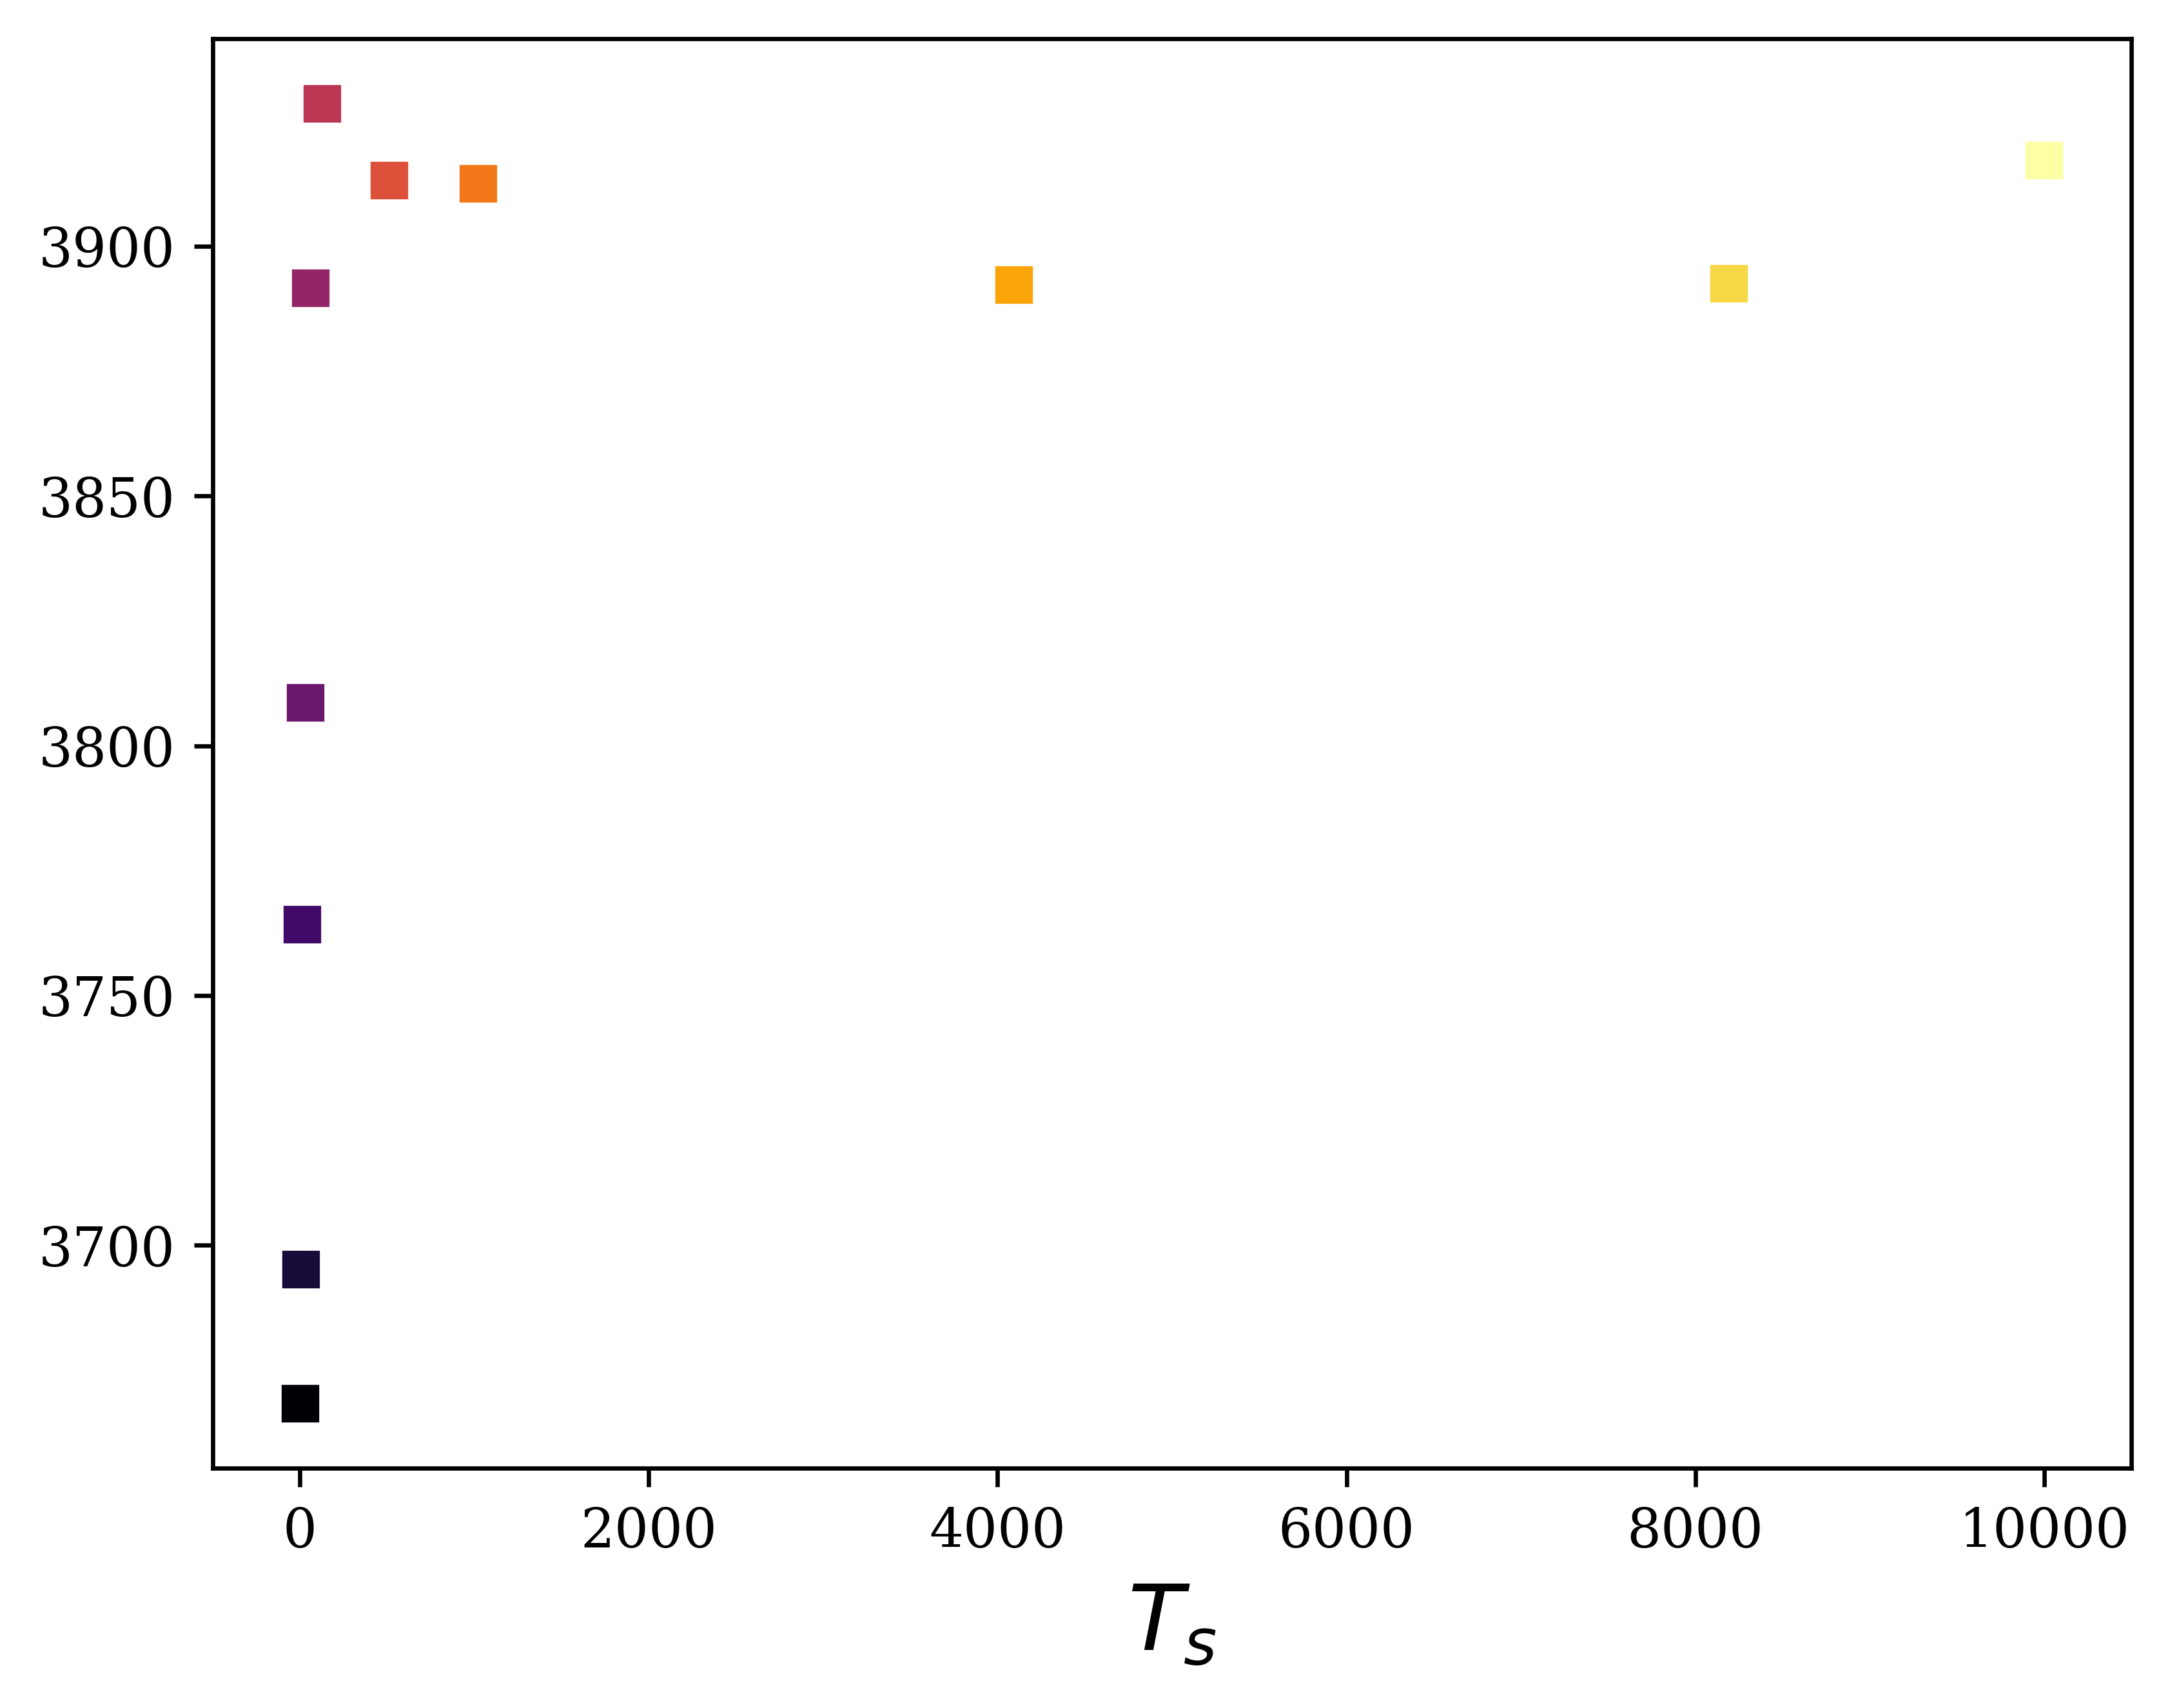

In [4]:
i = 0
plt.figure(dpi = 600)
ts = []
ml = []
for key, l in length.items():
    media=sum(l) / len(l) if len(l) > 0 else 0
    ts.append(key)
    ml.append(media)
    plt.plot(key,media,'s--')
    i+=1

plt.xlabel(r'$T_{s}$')

In [5]:
x = np.array(ts)
y = np.array(ml)

Text(0, 0.5, '$L$')

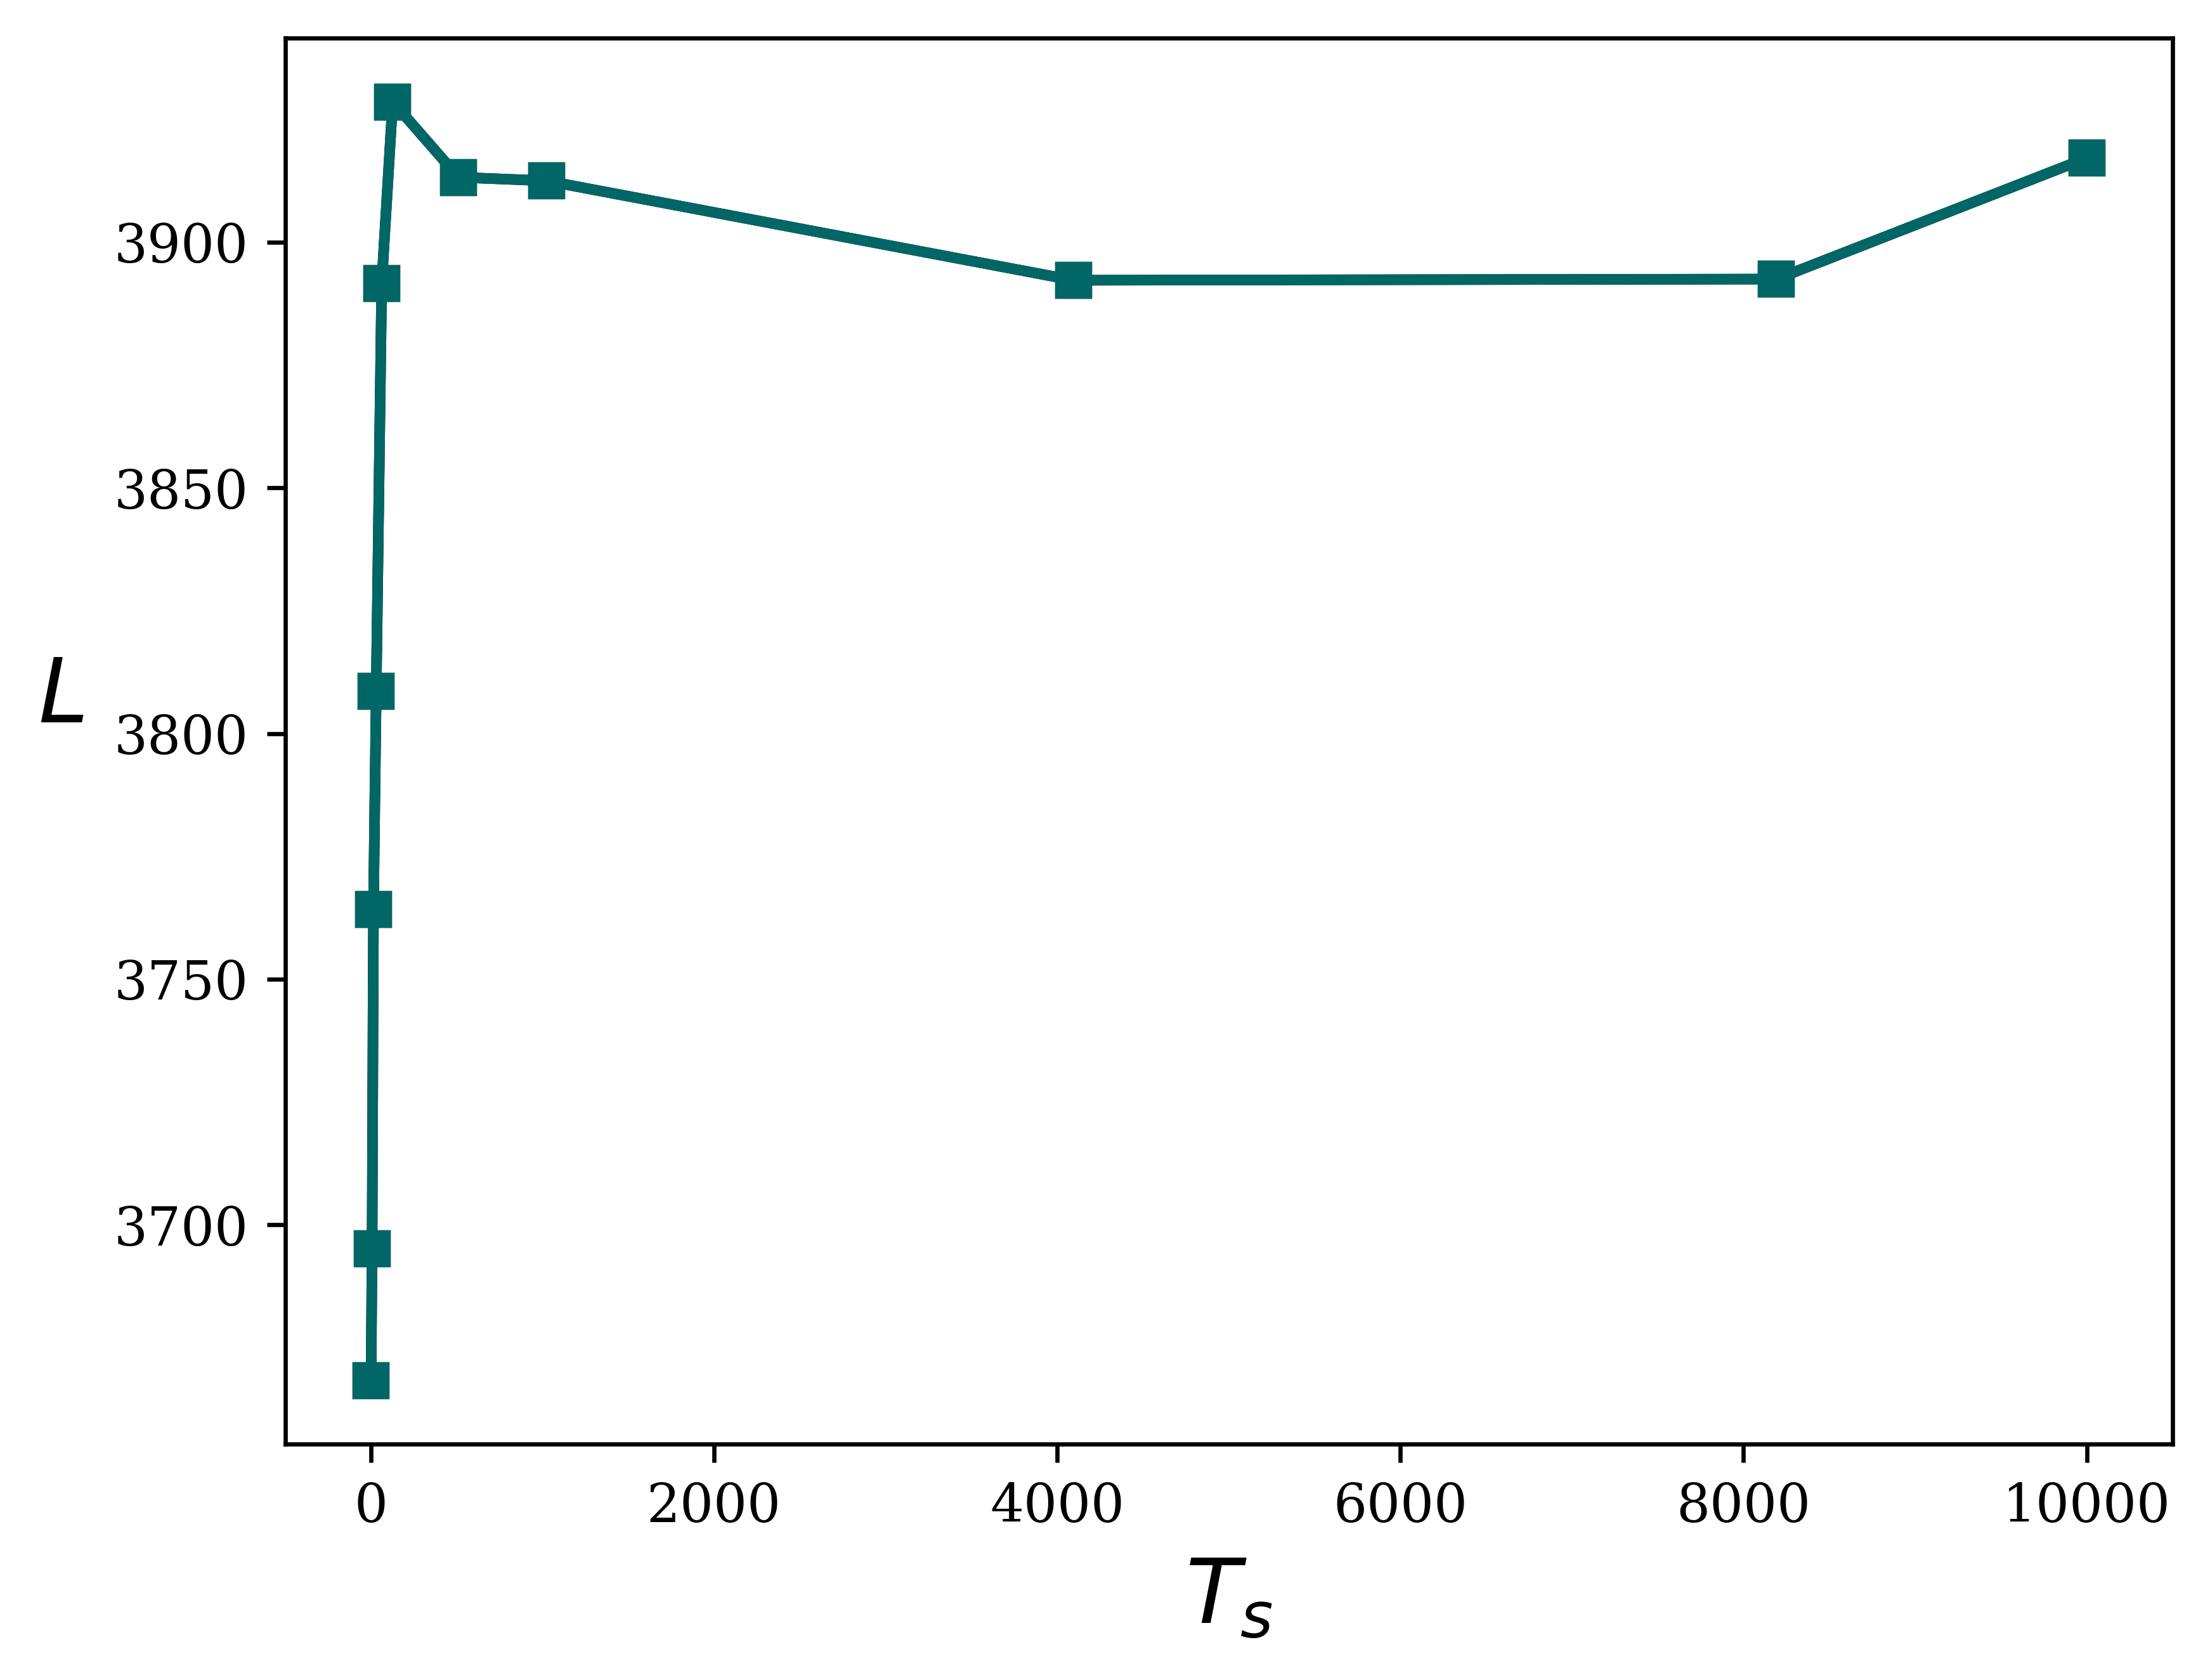

In [8]:
plt.figure
plt.figure(dpi = 600)
plt.plot(x,y,'s-', )
plt.plot(x,y,'s-', color = '#006666')
plt.xlabel(r'$T_{s}$')
plt.ylabel(r'$L$', rotation = 0,labelpad=10)

In [6]:
x = np.array(ts)
y = np.array(ml)

Text(0, 0.5, '$L$')

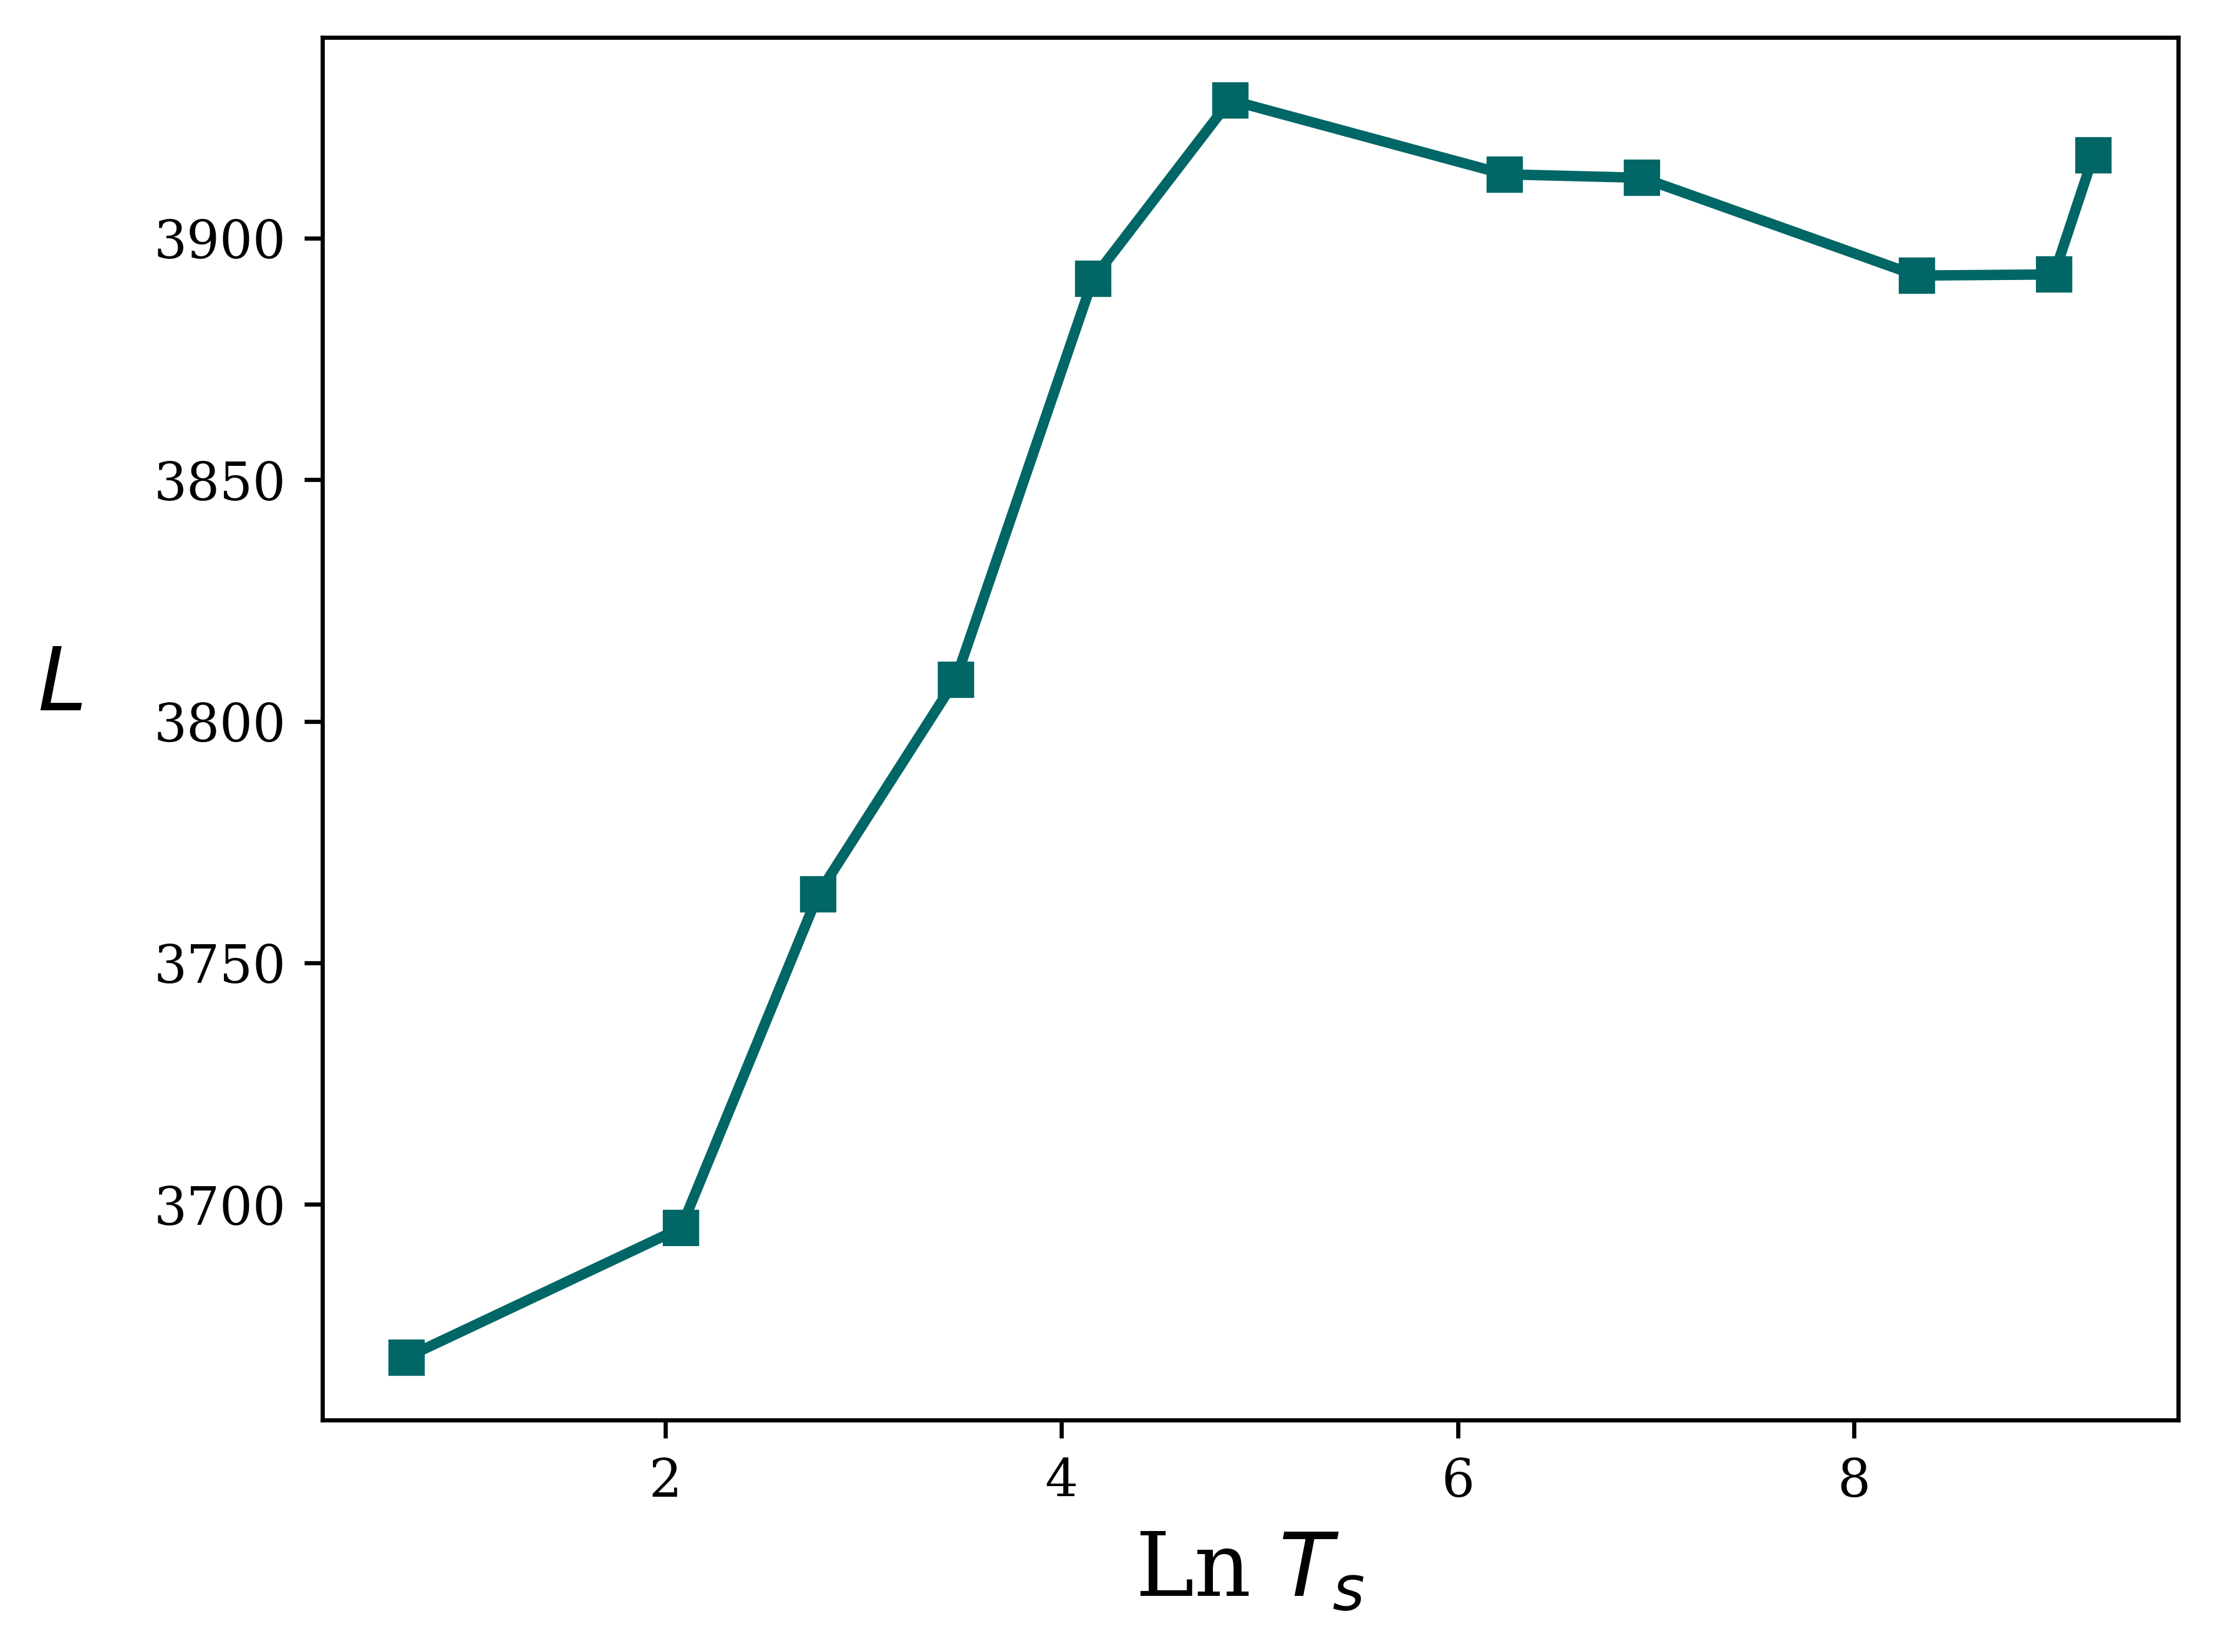

In [9]:
plt.figure(dpi = 600)
plt.plot(np.log(x),(y), 's-', color = '#006666')
plt.xlabel(r'Ln $T_{s}$')
plt.ylabel(r'$L$', rotation = 0,labelpad=18)